In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'0': 994, '1': 30}


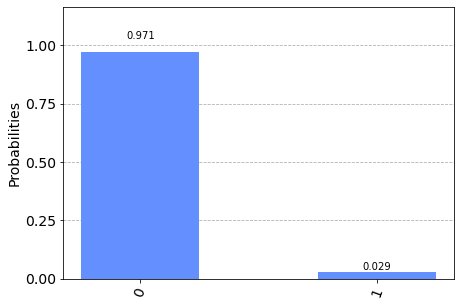

In [2]:
q = QuantumRegister(10)
c0 = ClassicalRegister(1, "c0")
qc = QuantumCircuit(q, c0, name="toffoli - ancilla")

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.h(q[4])

qc.ccx(q[0],q[1],q[6])
qc.ccx(q[2],q[6],q[7])
qc.ccx(q[3],q[7],q[8])

qc.ccx(q[4],q[8],q[5])

qc.ccx(q[3],q[7],q[8])
qc.ccx(q[2],q[6],q[7])
qc.ccx(q[0],q[1],q[6])

qc.measure(q[5], c0[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

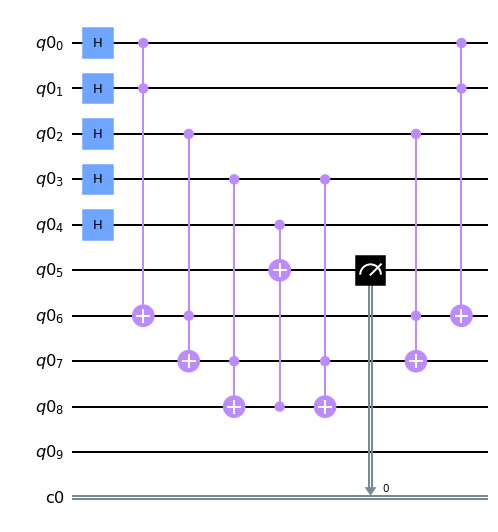

In [3]:
qc.draw(output='mpl')

In [ ]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_belem')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

In [ ]:
result_exp = job_exp.result()
print(result_exp)

In [ ]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])